In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [117]:

main_folder_path = "hangul"

image_data = []
labels = []

def process_images(folder_path, label):
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            image_path = os.path.join(folder_path, filename)
            img = Image.open(image_path)
            grayscale_img = img.convert('L')  # Convert image to grayscale
            resized_img = grayscale_img.resize((64, 64))  # Resize image to 28x28 pixels
            image_data.append(list(resized_img.getdata()))
            labels.append(label)


for letter in ['a', 'ae','b','bb','ch','d','e','eo','eu','g','gg','h','i','j','k','m','n','ng','o','p','r','s','ss','t','u','ya','yae','ye','yo','yu']:
    folder_path = os.path.join(main_folder_path, letter)
    process_images(folder_path, letter)

columns = [f"pixel_{i}" for i in range(len(image_data[0]))] 
df = pd.DataFrame(image_data, columns=columns)
df['label'] = labels

df.to_csv('hangul_dataset.csv', index=False)

print(df.head())

   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \

0      255      255      255      255      255      255      255      255   

1      255      255      255      255      255      255      255      255   

2      255      255      255      255      255      255      255      255   

3      255      255      255      255      255      255      255      255   

4      255      255      255      255      255      255      255      255   



   pixel_8  pixel_9  ...  pixel_4087  pixel_4088  pixel_4089  pixel_4090  \

0      255      255  ...         255         255         255         255   

1      255      255  ...         181         178         182         181   

2      255      255  ...         255         255         255         255   

3      255      255  ...         255         255         255         255   

4      255      255  ...         255         255         255         255   



   pixel_4091  pixel_4092  pixel_4093  pixel_4094  pixel_4095  lab

In [118]:
df.iloc[:, :-1] = df.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')

In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded = le.fit_transform(df['label'].values)
decoded = le.inverse_transform(encoded)
df['label2'] = encoded
print('The dataset has the following labels: ', le.classes_)

This dataset has following true labels,  ['a' 'ae' 'b' 'bb' 'ch' 'd' 'e' 'eo' 'eu' 'g' 'gg' 'h' 'i' 'j' 'k' 'm' 'n'

 'ng' 'o' 'p' 'r' 's' 'ss' 't' 'u' 'ya' 'yae' 'ye' 'yo' 'yu']


In [120]:
classes = le.classes_

In [121]:
dic={0:'a',1:'ae',2:'b',3:'bb',4:'ch',5:'d',6:'e',7:'eo',8:'eu',9:'g',10:'gg',11:'h',12:'i',13:'j',14:'k', 15:'m',16:'n', 17:'ng', 18:'o', 19: 'p', 20: 'r', 21: 's', 22: 'ss', 23:'t', 24: 'u', 25:'ya', 26:'yae', 27:'ye', 28: 'yo', 29: 'yu'}

In [122]:
df.shape

(2400, 4098)

In [123]:
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label,label2
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,a,0
1,255,255,255,255,255,255,255,255,255,255,...,178,182,181,184,185,163,135,126,a,0
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,a,0
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,a,0
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,a,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,yu,29
2396,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,yu,29
2397,254,254,254,255,255,255,255,255,254,254,...,252,255,254,255,253,228,196,185,yu,29
2398,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,yu,29


In [124]:
# dataset_shuffled = df.sample(frac=1, random_state=42)
# split the shuffled dataset into explanation data and target data.
X =df.iloc[:,0:4096]
y =df.iloc[:,[4097]]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.4)

In [125]:
X_train = X_train.astype('float32')/255
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')/255
y_test = y_test.astype('float32')

In [128]:
X_train= X_train.to_numpy()
y_train= y_train.to_numpy()
X_test= X_test.to_numpy()
y_test= y_test.to_numpy()

#reshape train data and test data into 64 * 64 * 1 channel
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1).astype('float32')

In [129]:
y_train = kr.utils.to_categorical(y_train, 30)
y_test = kr.utils.to_categorical(y_test, 30)
num_classes = y_train.shape[1]
num_classes

30

In [130]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
#         width_shift_range=0.01,
#         height_shift_range=0.01,
#         shear_range=0.1,
#         zoom_range=0.1,
)

train_generator = datagen.flow(X_train, y_train, batch_size=64)
test_generator = datagen.flow(X_test, y_test, batch_size=64, shuffle=False)

In [131]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    initial_lr = 0.001
    decay_factor=0.5
    decay_epochs=5
    return initial_lr * (decay_factor ** np.floor(epoch/decay_epochs))

lr_scheduler = LearningRateScheduler(lr_schedule)


In [132]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_3"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d_11 (Conv2D)          (None, 60, 60, 32)        832       

                                                                 

 max_pooling2d_11 (MaxPooli  (None, 30, 30, 32)        0         

 ng2D)                                                           

                                                                 

 flatten_3 (Flatten)         (None, 28800)             0         

                                                                 

 dense_6 (Dense)             (None, 128)               3686528   

                                                                 

 dense_7 (Dense)             (None, 30)                3870      

                                                                 


Total params: 3691230 (14.08 MB)

Trainable params: 3691230 (14.08 MB)

Non-trainable params: 0 (0.00 By

In [133]:
# model1 = model.fit(X_train, y_train,batch_size=128, epochs=20, validation_data=(X_test, y_test))

model1 = model.fit(train_generator, steps_per_epoch=len(X_train) // 64, epochs=20, validation_data=test_generator, validation_steps=len(X_test)//64,callbacks=[lr_scheduler])

Epoch 1/20

22/22 [==============================] - 1s 30ms/step - loss: 3.4563 - accuracy: 0.0959 - val_loss: 2.9943 - val_accuracy: 0.2625 - lr: 0.0010

Epoch 2/20

22/22 [==============================] - 1s 28ms/step - loss: 2.5186 - accuracy: 0.3794 - val_loss: 2.0761 - val_accuracy: 0.4625 - lr: 0.0010

Epoch 3/20

22/22 [==============================] - 1s 28ms/step - loss: 1.5795 - accuracy: 0.5792 - val_loss: 1.4089 - val_accuracy: 0.5979 - lr: 0.0010

Epoch 4/20

22/22 [==============================] - 1s 28ms/step - loss: 0.9811 - accuracy: 0.7384 - val_loss: 1.0036 - val_accuracy: 0.7271 - lr: 0.0010

Epoch 5/20

22/22 [==============================] - 1s 28ms/step - loss: 0.6348 - accuracy: 0.8358 - val_loss: 0.8618 - val_accuracy: 0.7646 - lr: 0.0010

Epoch 6/20

22/22 [==============================] - 1s 28ms/step - loss: 0.4513 - accuracy: 0.8991 - val_loss: 0.7095 - val_accuracy: 0.8052 - lr: 5.0000e-04

Epoch 7/20

22/22 [==============================] - 1s 28ms

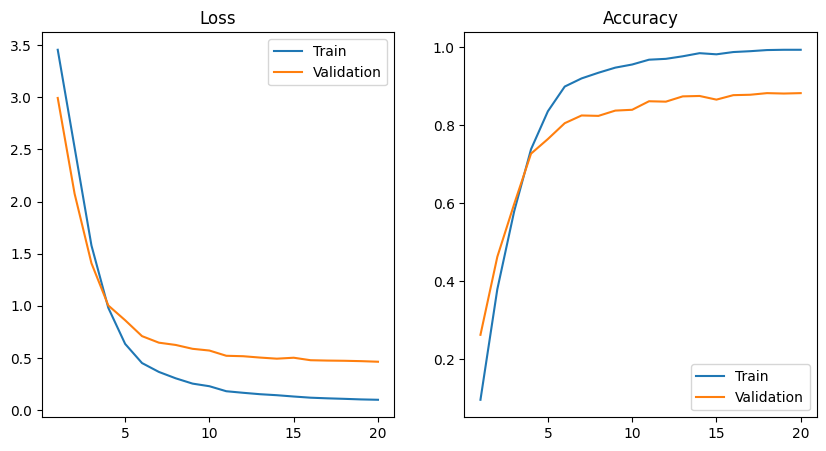

In [134]:
start = 1
end = 20

fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(range(start,end+1), model1.history['loss'][start-1:end], label='Train')
axes[0].plot(range(start,end+1), model1.history['val_loss'][start-1:end], label='Validation')
axes[0].set_title('Loss')
axes[0].legend()

axes[1].plot(range(start,end+1), model1.history['accuracy'][start-1:end], label='Train')
axes[1].plot(range(start,end+1), model1.history['val_accuracy'][start-1:end], label='Validation')
axes[1].set_title('Accuracy')
axes[1].legend()

plt.show()

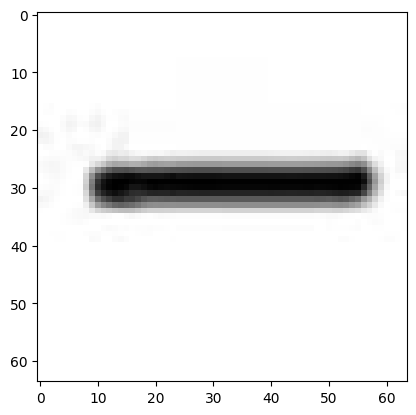

In [135]:
i=100
plt.imshow(X_test[[i]].reshape(64,64),cmap='gray')

In [136]:
prediction=model.predict(X_test[[i]]) 
prediction

1/1 [==============================] - 0s 19ms/step


array([[1.6056043e-04, 1.8667949e-07, 2.5824731e-06, 2.1821952e-08,
        1.3009021e-07, 1.9796484e-08, 2.0555936e-08, 3.9079078e-03,
        9.8574126e-01, 1.9388333e-04, 1.1137304e-05, 7.0647312e-12,
        2.9458615e-06, 1.7952389e-06, 1.4017256e-07, 3.9231912e-07,
        4.2592059e-05, 1.1647047e-06, 9.4549777e-03, 4.7070438e-11,
        1.1982468e-06, 7.5546427e-06, 1.6982124e-04, 4.6586870e-11,
        1.6509868e-04, 2.8472865e-08, 1.1591359e-09, 6.0064870e-11,
        1.3362271e-04, 1.1463961e-06]], dtype=float32)

In [137]:
print("The answer is",dic[np.argmax(prediction)],".")

The answer is eu . :-)


30/30 [==============================] - 0s 4ms/step

              precision    recall  f1-score   support



           0       0.85      0.91      0.88        32

           1       0.78      0.91      0.84        32

           2       0.97      0.88      0.92        32

           3       1.00      0.88      0.93        32

           4       0.77      0.84      0.81        32

           5       0.72      0.88      0.79        32

           6       1.00      0.88      0.93        32

           7       0.91      1.00      0.96        32

           8       0.91      0.94      0.92        32

           9       0.97      0.97      0.97        32

          10       0.81      0.94      0.87        32

          11       0.91      0.91      0.91        32

          12       0.97      0.91      0.94        32

          13       0.76      0.69      0.72        32

          14       1.00      0.94      0.97        32

          15       0.88      0.91      0.89        32

         

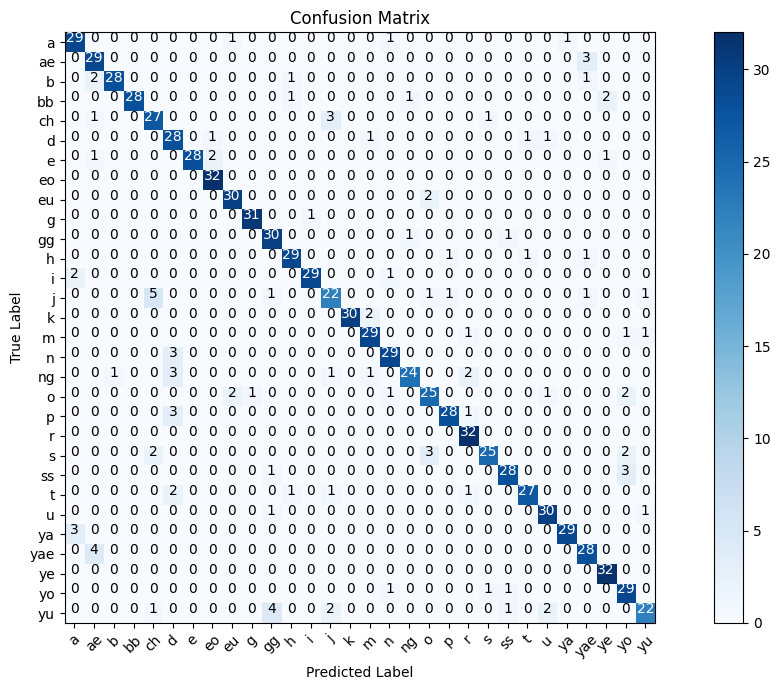

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have already trained your model and obtained predictions
# Replace these placeholders with actual predictions from your model
y_pred = model.predict(X_test)
y_true = y_test  # Your true labels

# Convert one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_true, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Print the classification report
print(classification_report(y_true_labels, y_pred_labels))

# Plot the confusion matrix
plt.figure(figsize=(12, 7))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()


In [143]:
incorrect_predictions = {}
for true_class in range(len(classes)):
    if conf_matrix[true_class, true_class] != np.sum(conf_matrix[true_class]) - conf_matrix[true_class, true_class]:
        predicted_classes = np.where(conf_matrix[true_class] > 0)[0]
        predicted_with_count = {classes[pred_class]: conf_matrix[true_class, pred_class]
                                for pred_class in predicted_classes if pred_class != true_class}
        incorrect_predictions[classes[true_class]] = {
            'count': np.sum(conf_matrix[true_class]) - conf_matrix[true_class, true_class],
            'predicted_with': predicted_with_count
        }

# Display the table
print("True Label\tPredicted Wrong\tPredicted Label (Count)")
print("=====================================================")
for true_label, info in incorrect_predictions.items():
    predicted_with = ', '.join([f"{pred_label} ({count})" for pred_label, count in info['predicted_with'].items()])
    print(f"{true_label}\t\t{info['count']}\t\t{predicted_with}")

True Label	Predicted Wrong	Predicted Label (Count)


a		3		eu (1), n (1), ya (1)

ae		3		yae (3)

b		4		ae (2), h (1), yae (1)

bb		4		h (1), ng (1), ye (2)

ch		5		ae (1), j (3), s (1)

d		4		eo (1), m (1), t (1), u (1)

e		4		ae (1), eo (2), ye (1)

eo		0		

eu		2		o (2)

g		1		i (1)

gg		2		ng (1), ss (1)

h		3		p (1), t (1), yae (1)

i		3		a (2), n (1)

j		10		ch (5), gg (1), o (1), p (1), yae (1), yu (1)

k		2		m (2)

m		3		r (1), yo (1), yu (1)

n		3		d (3)

ng		8		b (1), d (3), j (1), m (1), r (2)

o		7		eu (2), g (1), n (1), u (1), yo (2)

p		4		d (3), r (1)

r		0		

s		7		ch (2), o (3), yo (2)

ss		4		gg (1), yo (3)

t		5		d (2), h (1), j (1), r (1)

u		2		gg (1), yu (1)

ya		3		a (3)

yae		4		ae (4)

ye		0		

yo		3		n (1), s (1), ss (1)

yu		10		ch (1), gg (4), j (2), ss (1), u (2)


In [145]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(64, 64, 1))) 
    
    
    # Tune the number of filters and kernel size for each convolutional layer
    for i in range(hp.Int('num_conv_layers', min_value=1, max_value=5)):
        model.add(layers.Conv2D(
            filters=hp.Int(f'conv_{i}_filters', min_value=32, max_value=256, step=32),
            kernel_size=hp.Int(f'conv_{i}_kernel', min_value=3, max_value=7),
            activation='relu',
            padding='same'
        ))
        model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=64, max_value=512, step=32),
        activation='relu'
    ))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Replace 10 with the number of classes
    
    # Compile the model with optimizer and loss function
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Initialize the RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Replace with your chosen metric
    max_trials=10,  # Number of trials to perform
    directory='my_tuning_dir',  # Directory to store results
    project_name='my_cnn_tuning'  # Name of the project
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=20)  # Adjust epochs as needed

# Get the best hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

INFO:tensorflow:Reloading Tuner from my_tuning_dir/my_cnn_tuning/tuner0.json


INFO:tensorflow:Reloading Tuner from my_tuning_dir/my_cnn_tuning/tuner0.json


INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [162]:
best_model.save('hangul_best_model.keras')

In [146]:
best_model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25

45/45 [==============================] - 37s 816ms/step - loss: 3.2839 - accuracy: 0.0639 - val_loss: 1.9044 - val_accuracy: 0.4229

Epoch 2/25

45/45 [==============================] - 37s 816ms/step - loss: 0.8495 - accuracy: 0.7340 - val_loss: 0.4263 - val_accuracy: 0.8771

Epoch 3/25

45/45 [==============================] - 35s 785ms/step - loss: 0.2116 - accuracy: 0.9319 - val_loss: 0.2513 - val_accuracy: 0.9156

Epoch 4/25

45/45 [==============================] - 35s 781ms/step - loss: 0.1349 - accuracy: 0.9569 - val_loss: 0.1245 - val_accuracy: 0.9635

Epoch 5/25

45/45 [==============================] - 35s 779ms/step - loss: 0.0553 - accuracy: 0.9826 - val_loss: 0.1540 - val_accuracy: 0.9615

Epoch 6/25

45/45 [==============================] - 35s 783ms/step - loss: 0.0548 - accuracy: 0.9861 - val_loss: 0.1150 - val_accuracy: 0.9719

Epoch 7/25

45/45 [==============================] - 35s 783ms/step - loss: 0.0133 - accuracy: 0.9979 - val_loss: 0.1528 - val_acc

30/30 [==============================] - 6s 205ms/step

              precision    recall  f1-score   support



           0       1.00      1.00      1.00        32

           1       0.97      1.00      0.98        32

           2       1.00      0.88      0.93        32

           3       0.97      1.00      0.98        32

           4       0.97      0.94      0.95        32

           5       0.94      1.00      0.97        32

           6       0.97      1.00      0.98        32

           7       1.00      1.00      1.00        32

           8       1.00      1.00      1.00        32

           9       1.00      1.00      1.00        32

          10       0.97      1.00      0.98        32

          11       0.94      1.00      0.97        32

          12       1.00      1.00      1.00        32

          13       0.97      0.97      0.97        32

          14       1.00      0.97      0.98        32

          15       0.94      0.97      0.95        32

       

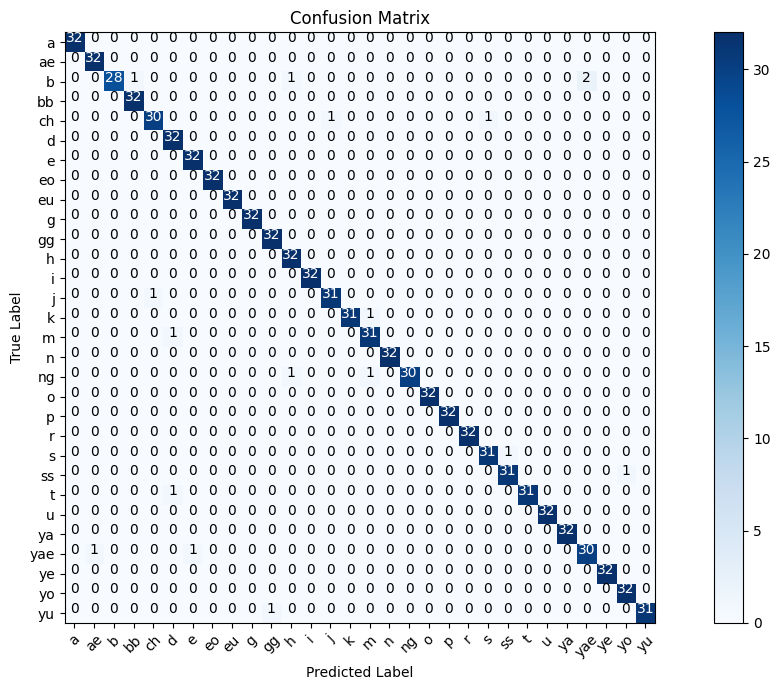

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have already trained your model and obtained predictions
# Replace these placeholders with actual predictions from your model
y_pred = best_model.predict(X_test)
y_true = y_test  # Your true labels

# Convert one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_true, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Print the classification report
print(classification_report(y_true_labels, y_pred_labels))

# Plot the confusion matrix
plt.figure(figsize=(12, 7))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()


In [171]:
incorrect_predictions = {}
for true_class in range(len(classes)):
    if conf_matrix[true_class, true_class] != np.sum(conf_matrix[true_class]) - conf_matrix[true_class, true_class]:
        predicted_classes = np.where(conf_matrix[true_class] > 0)[0]
        predicted_with_count = {classes[pred_class]: conf_matrix[true_class, pred_class]
                                for pred_class in predicted_classes if pred_class != true_class}
        incorrect_predictions[classes[true_class]] = {
            'count': np.sum(conf_matrix[true_class]) - conf_matrix[true_class, true_class],
            'predicted_with': predicted_with_count
        }

# Display the table
print("True Label\tPredicted Wrong\tPredicted Label (Count)")
print("=====================================================")
for true_label, info in incorrect_predictions.items():
    predicted_with = ', '.join([f"{pred_label} ({count})" for pred_label, count in info['predicted_with'].items()])
    print(f"{true_label}\t\t{info['count']}\t\t{predicted_with}")

True Label	Predicted Wrong	Predicted Label (Count)


a		0		

ae		0		

b		4		bb (1), h (1), yae (2)

bb		0		

ch		2		j (1), s (1)

d		0		

e		0		

eo		0		

eu		0		

g		0		

gg		0		

h		0		

i		0		

j		1		ch (1)

k		1		m (1)

m		1		d (1)

n		0		

ng		2		h (1), m (1)

o		0		

p		0		

r		0		

s		1		ss (1)

ss		1		yo (1)

t		1		d (1)

u		0		

ya		0		

yae		2		ae (1), e (1)

ye		0		

yo		0		

yu		1		gg (1)


# Without param tuning

1/1 [==============================] - 0s 13ms/step


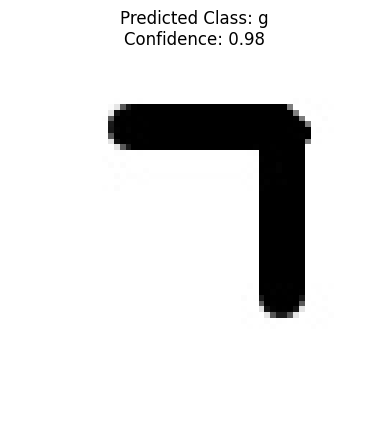

1/1 [==============================] - 0s 7ms/step


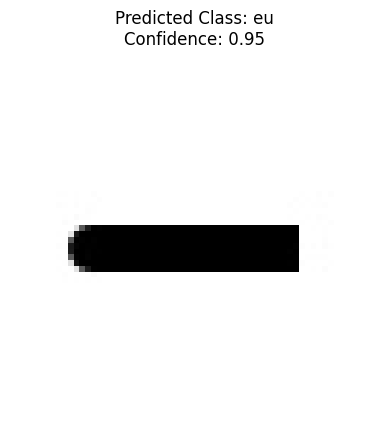

1/1 [==============================] - 0s 7ms/step


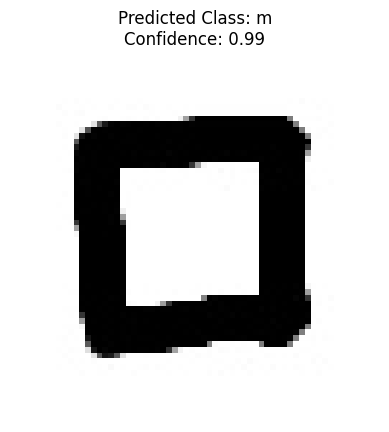

1/1 [==============================] - 0s 6ms/step


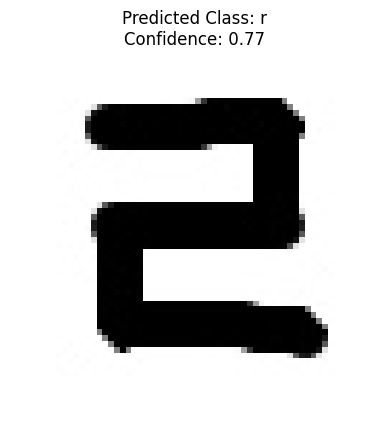

1/1 [==============================] - 0s 7ms/step


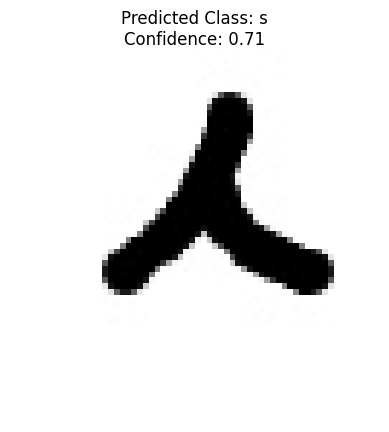

1/1 [==============================] - 0s 7ms/step


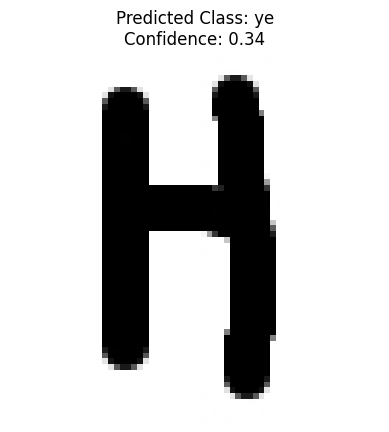

1/1 [==============================] - 0s 7ms/step


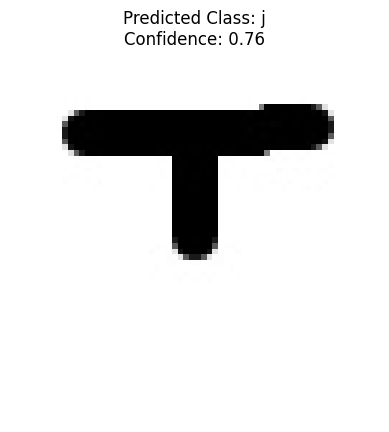

1/1 [==============================] - 0s 6ms/step


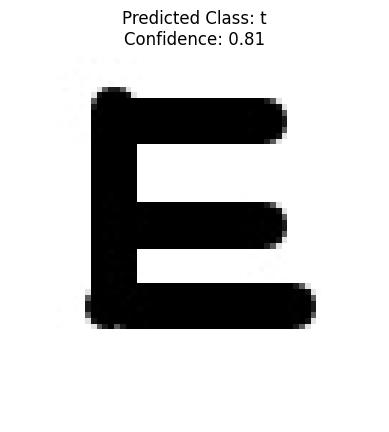

1/1 [==============================] - 0s 6ms/step


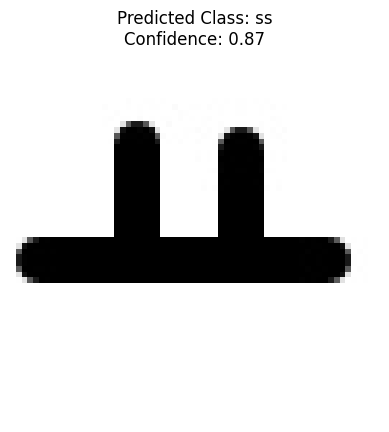

1/1 [==============================] - 0s 7ms/step


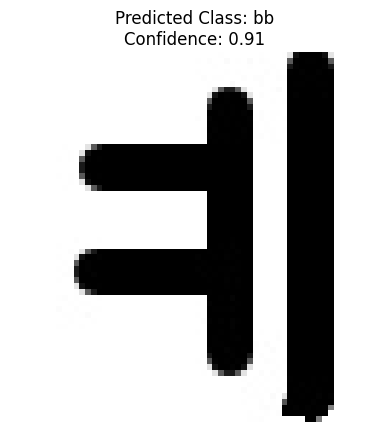

1/1 [==============================] - 0s 7ms/step


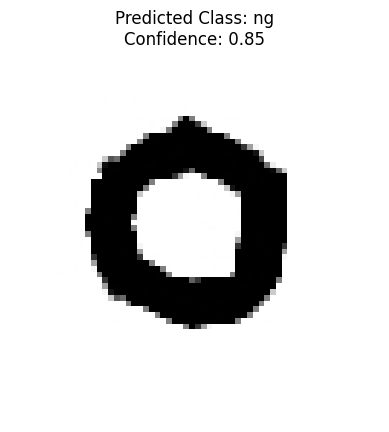

1/1 [==============================] - 0s 7ms/step


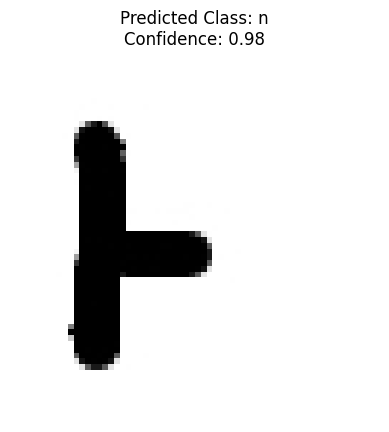

1/1 [==============================] - 0s 7ms/step


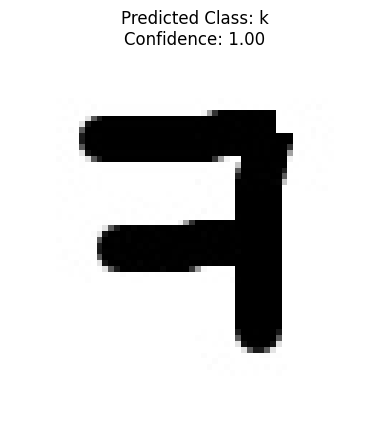

1/1 [==============================] - 0s 6ms/step


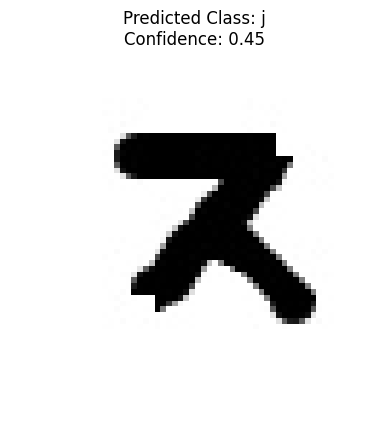

1/1 [==============================] - 0s 7ms/step


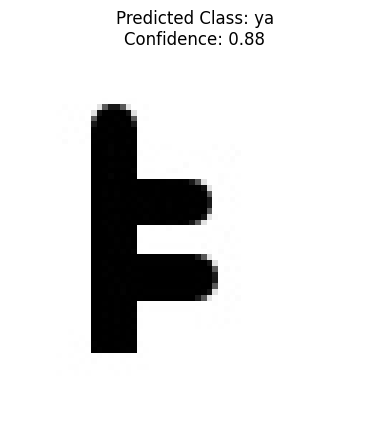

1/1 [==============================] - 0s 7ms/step


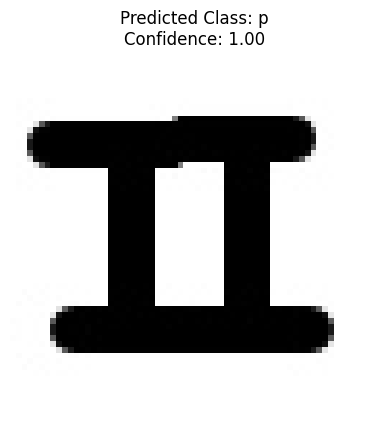

1/1 [==============================] - 0s 6ms/step


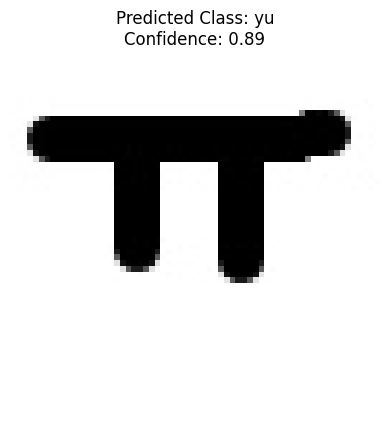

1/1 [==============================] - 0s 7ms/step


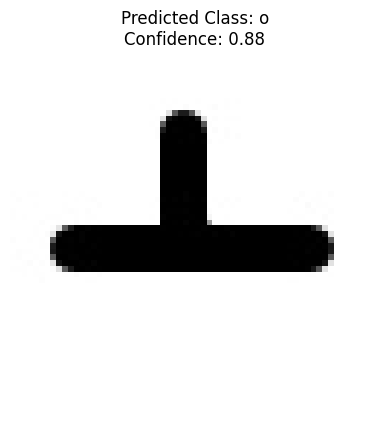

1/1 [==============================] - 0s 6ms/step


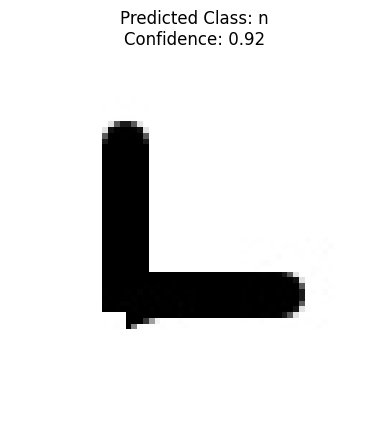

1/1 [==============================] - 0s 6ms/step


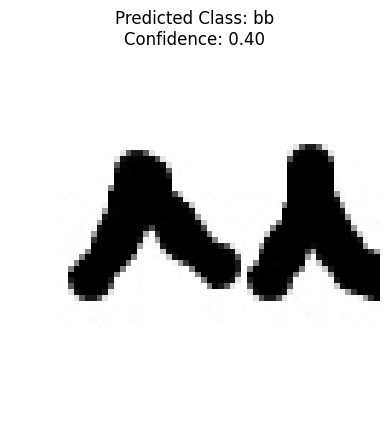

1/1 [==============================] - 0s 7ms/step


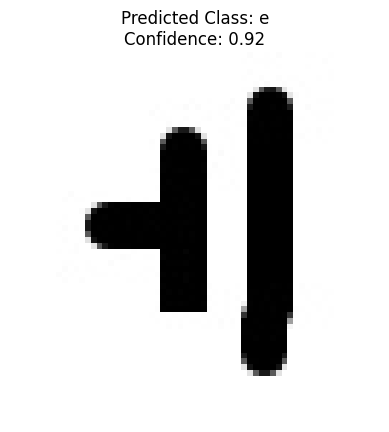

1/1 [==============================] - 0s 7ms/step


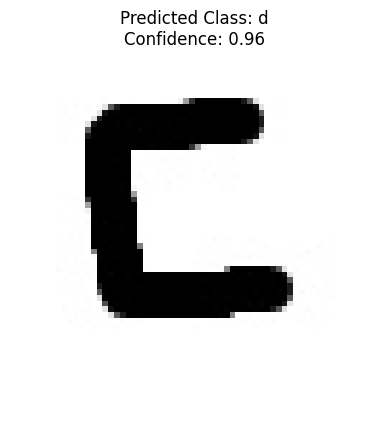

1/1 [==============================] - 0s 8ms/step


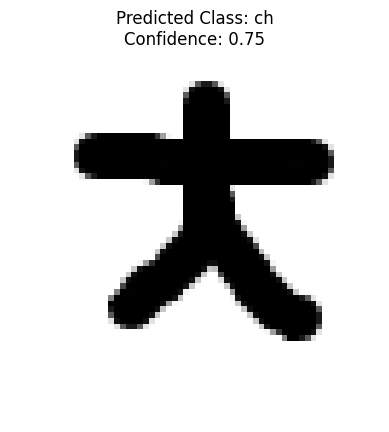

1/1 [==============================] - 0s 7ms/step


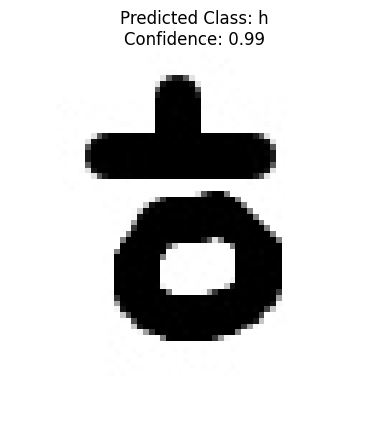

1/1 [==============================] - 0s 7ms/step


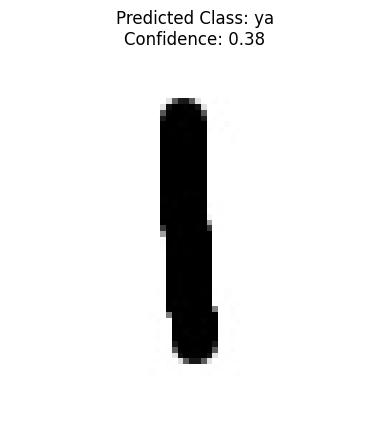

1/1 [==============================] - 0s 7ms/step


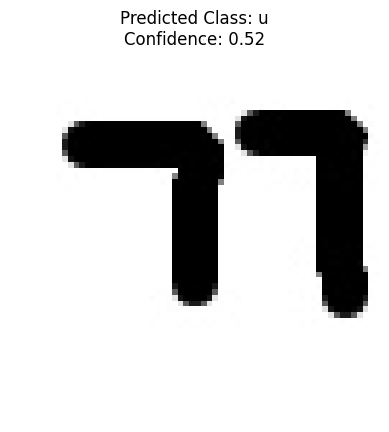

1/1 [==============================] - 0s 7ms/step


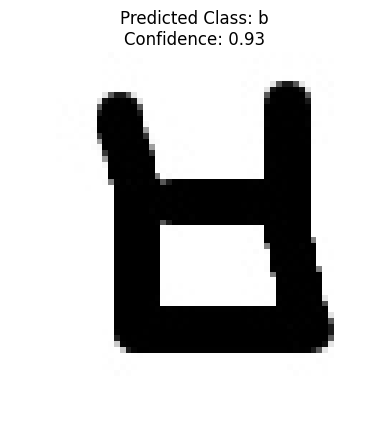

1/1 [==============================] - 0s 7ms/step


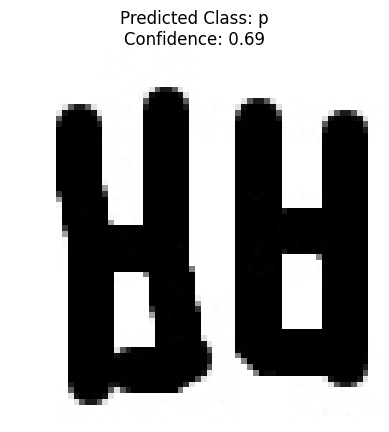

1/1 [==============================] - 0s 8ms/step


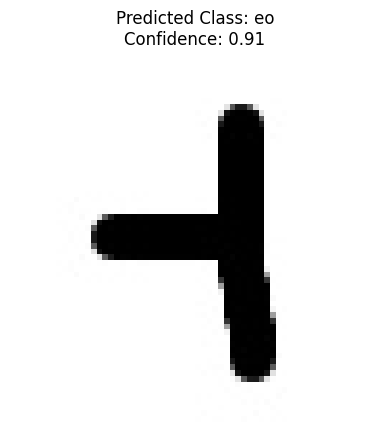

1/1 [==============================] - 0s 7ms/step


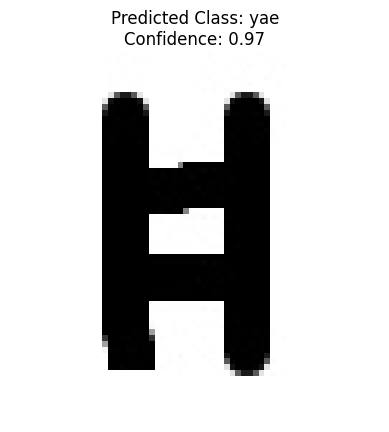

In [194]:

# Specify the directory containing the images
image_directory = 'hangul_written_test'

# Iterate over image files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_directory, filename)
        
        # Load and preprocess the image
        img = Image.open(image_path)
        input_width, input_height = 64, 64
        inverted_img = img.resize((input_width, input_height))
        img_gray = inverted_img.convert('L')
        img_array = np.array(img_gray)
        img_array = img_array.astype('float32')
        img_array /= 255.0
        img_array = np.expand_dims(img_array, axis=0)
        img_array = np.expand_dims(img_array, axis=-1)

        # Predict the class label for the image
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        predicted_class_label = dic[predicted_class_index]
        confidence_score = predictions[0, predicted_class_index]

        # Display the image and prediction
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted Class: {predicted_class_label}\nConfidence: {confidence_score:.2f}")
        plt.axis('off')
        plt.show()

# With param tuning

1/1 [==============================] - 0s 24ms/step


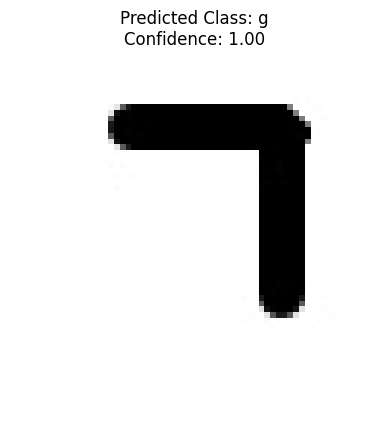

1/1 [==============================] - 0s 19ms/step


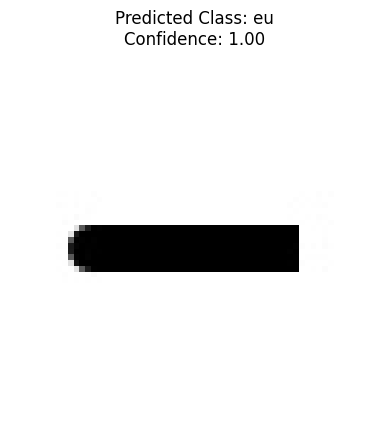

1/1 [==============================] - 0s 18ms/step


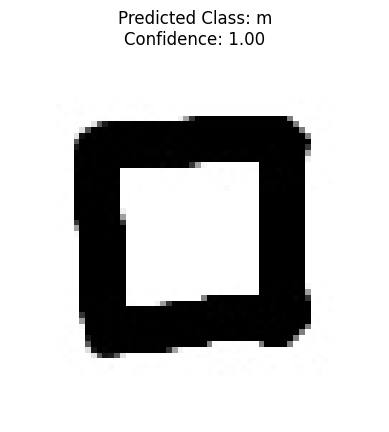

1/1 [==============================] - 0s 17ms/step


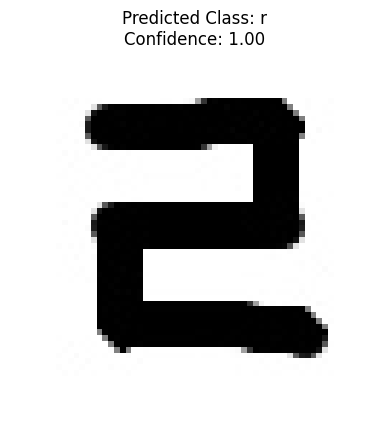

1/1 [==============================] - 0s 17ms/step


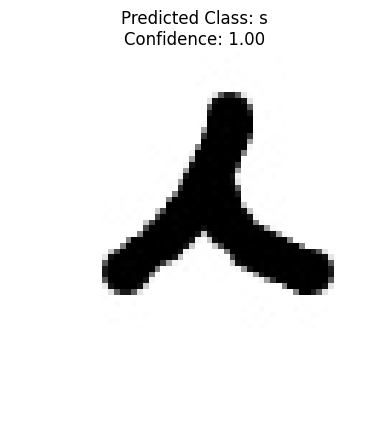

1/1 [==============================] - 0s 18ms/step


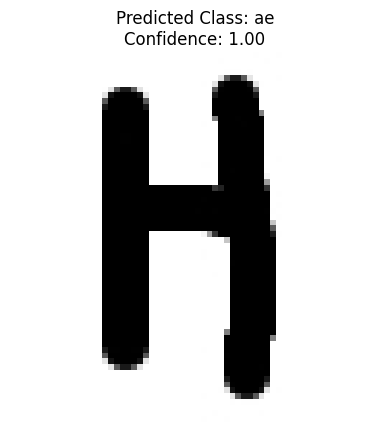

1/1 [==============================] - 0s 17ms/step


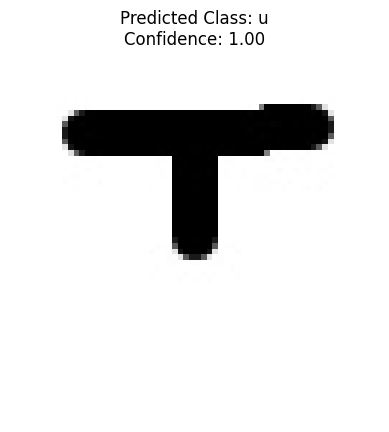

1/1 [==============================] - 0s 18ms/step


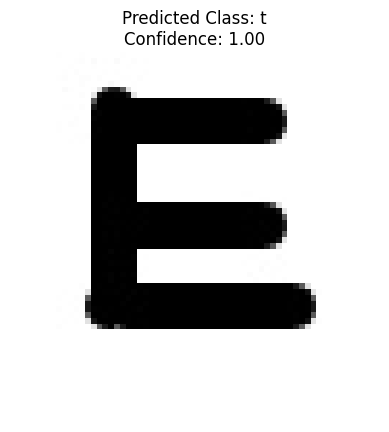

1/1 [==============================] - 0s 17ms/step


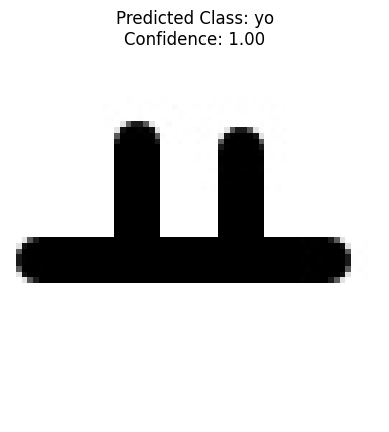

1/1 [==============================] - 0s 17ms/step


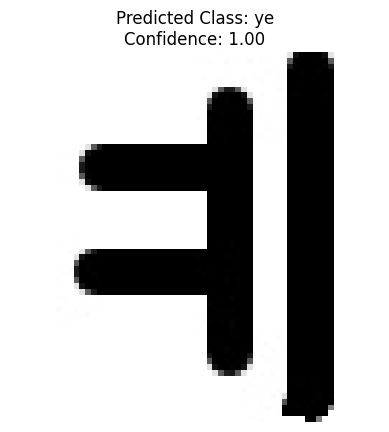

1/1 [==============================] - 0s 17ms/step


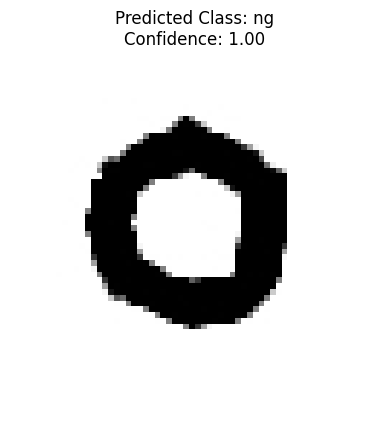

1/1 [==============================] - 0s 17ms/step


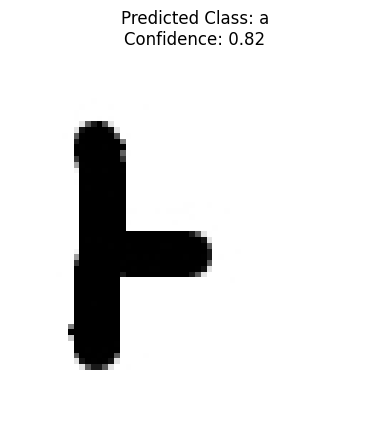

1/1 [==============================] - 0s 18ms/step


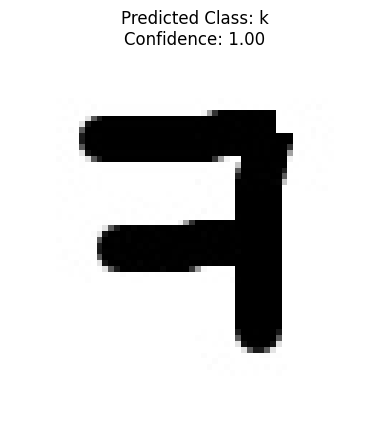

1/1 [==============================] - 0s 18ms/step


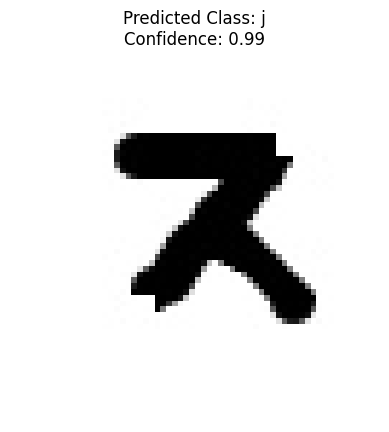

1/1 [==============================] - 0s 18ms/step


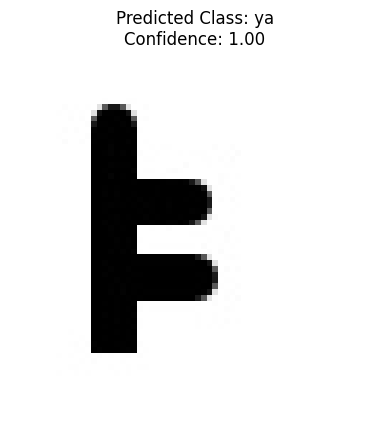

1/1 [==============================] - 0s 19ms/step


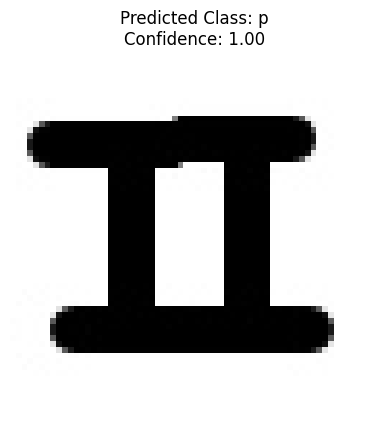

1/1 [==============================] - 0s 19ms/step


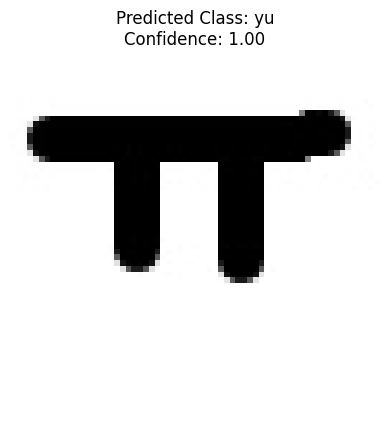

1/1 [==============================] - 0s 19ms/step


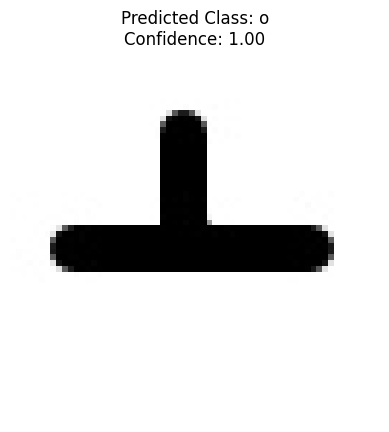

1/1 [==============================] - 0s 20ms/step


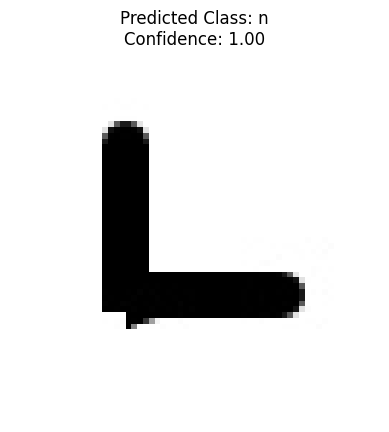

1/1 [==============================] - 0s 19ms/step


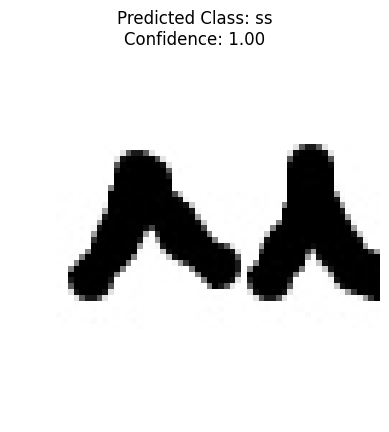

1/1 [==============================] - 0s 17ms/step


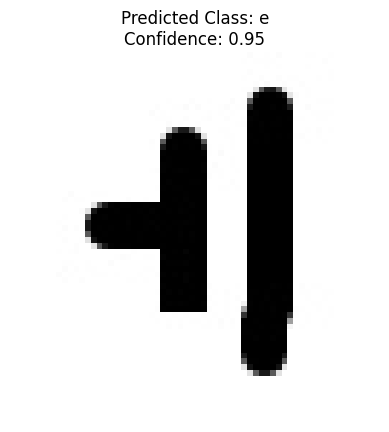

1/1 [==============================] - 0s 18ms/step


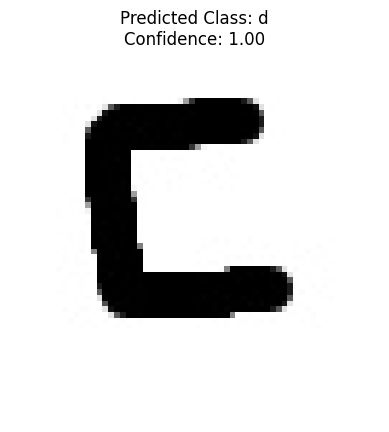

1/1 [==============================] - 0s 17ms/step


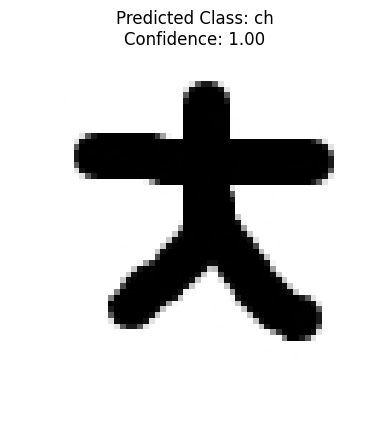

1/1 [==============================] - 0s 18ms/step


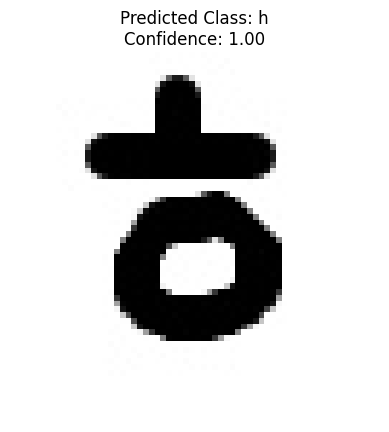

1/1 [==============================] - 0s 19ms/step


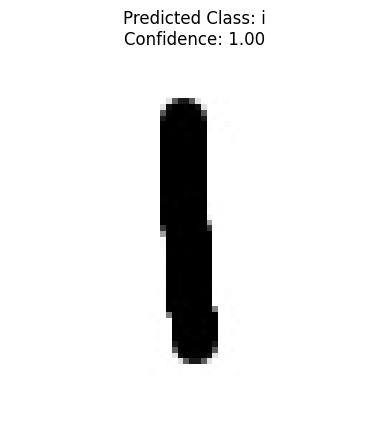

1/1 [==============================] - 0s 18ms/step


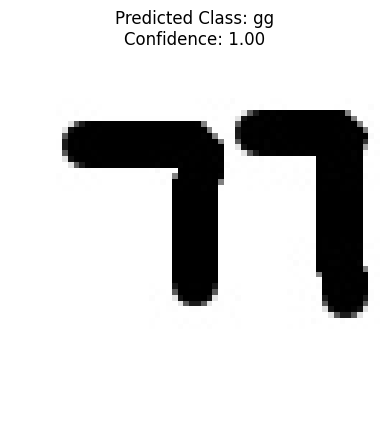

1/1 [==============================] - 0s 17ms/step


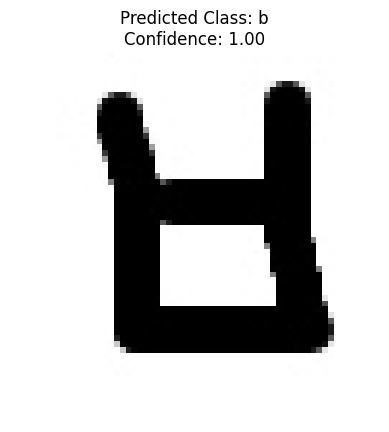

1/1 [==============================] - 0s 18ms/step


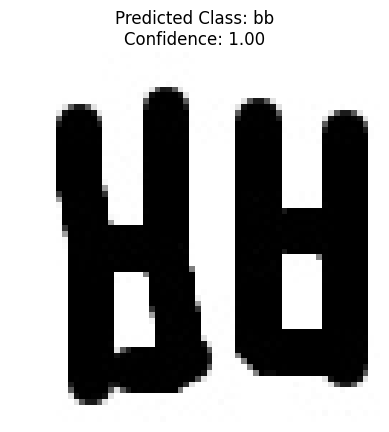

1/1 [==============================] - 0s 18ms/step


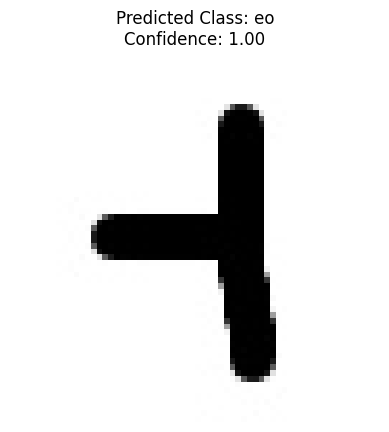

1/1 [==============================] - 0s 17ms/step


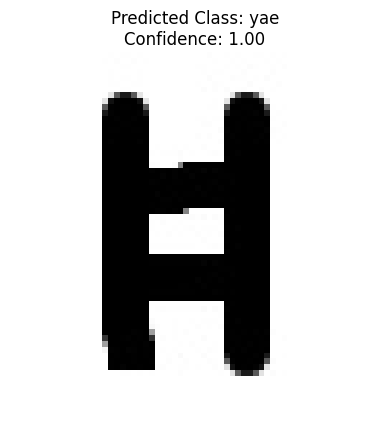

In [193]:

# Specify the directory containing the images
image_directory = 'hangul_written_test'

# Iterate over image files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_directory, filename)
        
        # Load and preprocess the image
        img = Image.open(image_path)
        input_width, input_height = 64, 64
        inverted_img = img.resize((input_width, input_height))
        img_gray = inverted_img.convert('L')
        img_array = np.array(img_gray)
        img_array = img_array.astype('float32')
        img_array /= 255.0
        img_array = np.expand_dims(img_array, axis=0)
        img_array = np.expand_dims(img_array, axis=-1)

        # Predict the class label for the image
        predictions = best_model.predict(img_array)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        predicted_class_label = dic[predicted_class_index]
        confidence_score = predictions[0, predicted_class_index]

        # Display the image and prediction
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted Class: {predicted_class_label}\nConfidence: {confidence_score:.2f}")
        plt.axis('off')
        plt.show()